In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malware-analysis-datasets-pe-section-headers/pe_section_headers.csv
/kaggle/input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv
/kaggle/input/malware-analysis-datasets-raw-pe-as-image/raw_pe_images.csv
/kaggle/input/malware-analysis-datasets-top1000-pe-imports/top_1000_pe_imports.csv


# Malware Analysis of Cuckoo sandbox reports

## 1. Analysis based on API calls


**Importing the necessary python libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

**Reading the dataset**

In [34]:
api_df = pd.read_csv('../input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv')

**Displaying the dataset**

In [35]:
api_df.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


Column name: hash
Description: MD5 hash of the example
Type: 32 bytes string

Column name: t0 … t99
Description: API call
Type: Integer (0-306)

Column name: malware
Description: Class
Type: Integer: 0 (Goodware) or 1 (Malware)

**Basic EDA**

Our finaly output is to detect if the given program is a malware or not. Therefore, we display the number of M/B the dataset column has

Countplot displaying the count of M/B


<AxesSubplot:xlabel='malware', ylabel='count'>

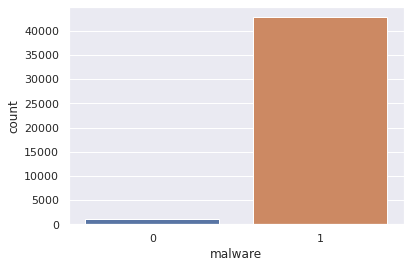

In [36]:
sns.countplot(x='malware',data=api_df)

In [37]:
api_df['malware'].value_counts()

1    42797
0     1079
Name: malware, dtype: int64

**Since the dataset contains a large amount of data, our countplot set the y axis to 5000.
Upon getting the value of counts we can see that 1079 programs are not malwares and 42797 prorams are malwares.
We can understand this by the visualisation of the bargraph which shows large presence of malwares.**

**Shape of the dataset**

In [39]:
print('Data Frame dimensions: {}'.format(api_df.shape))

Data Frame dimensions: (43876, 102)


In [38]:
api_df['malware'].describe()

count    43876.000000
mean         0.975408
std          0.154880
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: malware, dtype: float64

**Null and NaN values check**

In [40]:
api_df.isnull().sum()

hash       0
t_0        0
t_1        0
t_2        0
t_3        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 102, dtype: int64

In [42]:
api_df.isna().sum()

hash       0
t_0        0
t_1        0
t_2        0
t_3        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 102, dtype: int64

**MD5 hash:** As a hash function, MD5 maps a set of data to a bit string of a fixed size called the hash value. Hash functions have variable levels of complexity and difficulty and are used for cryptocurrency, password security, and message security.

For our usage, we can drop the hash column and work with the api call sequences

In [44]:
api_df = api_df.drop(['hash'],axis=1)

In [45]:
api_df.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,112,274,158,215,274,158,215,298,76,208,...,71,297,135,171,215,35,208,56,71,1
1,82,208,187,208,172,117,172,117,172,117,...,81,240,117,71,297,135,171,215,35,1
2,16,110,240,117,240,117,240,117,240,117,...,65,112,123,65,112,123,65,113,112,1
3,82,208,187,208,172,117,172,117,172,117,...,208,302,208,302,187,208,302,228,302,1
4,82,240,117,240,117,240,117,240,117,172,...,209,260,40,209,260,141,260,141,260,1


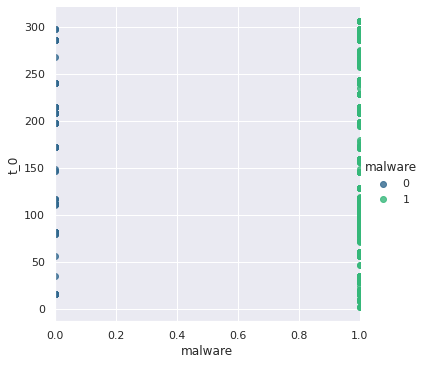

In [46]:
sns.lmplot(x='malware', y='t_0',hue='malware',data=api_df,palette='viridis')

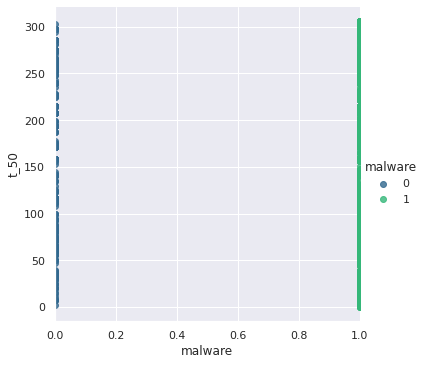

In [48]:
sns.lmplot(x='malware', y='t_50',hue='malware',data=api_df,palette='viridis')

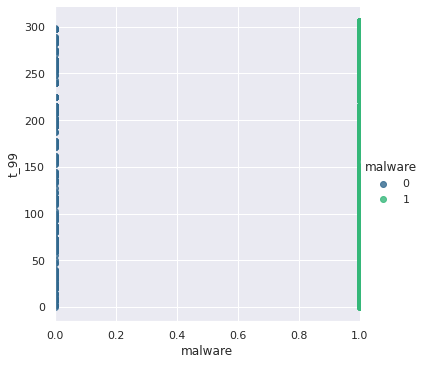

In [47]:
sns.lmplot(x='malware', y='t_99',hue='malware',data=api_df,palette='viridis')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='malware', ylabel='Density'>

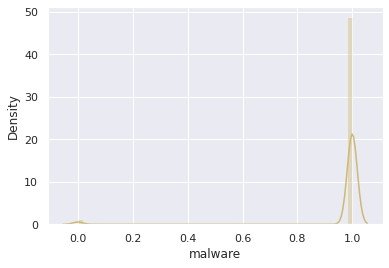

In [49]:
sns.distplot(api_df['malware'] ,color='y')

<AxesSubplot:>

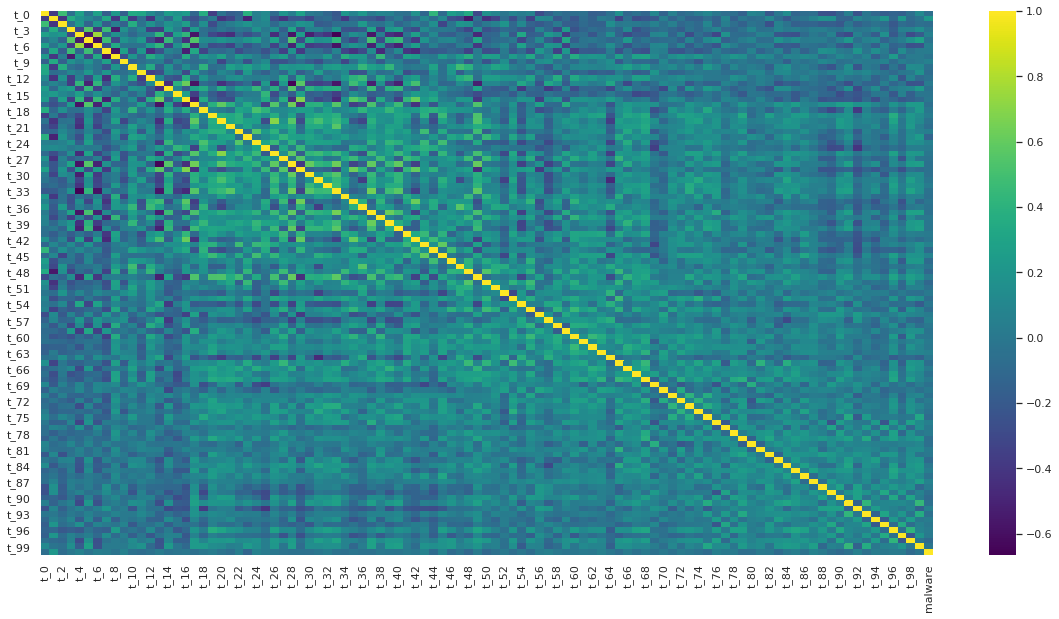

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(api_df.corr(),cmap='viridis')

## Predicting malware based on API calls

### Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

Y= api_df['malware'].values
X= api_df.drop('malware', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=101)

lets see what the arrays are:

1. X array is made up of all the api call sequences from t_0 to t_99 for all the samples
2. Y array is made up of the malware column



In [54]:
X

array([[112, 274, 158, ..., 208,  56,  71],
       [ 82, 208, 187, ..., 171, 215,  35],
       [ 16, 110, 240, ...,  65, 113, 112],
       ...,
       [ 82, 240, 117, ..., 260, 141, 260],
       [ 82, 240, 117, ..., 141, 260, 141],
       [112, 274, 158, ..., 208,  56,  71]])

In [55]:
Y

array([1, 1, 1, ..., 1, 1, 1])

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Predicting using Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [60]:
lr_pred = lr.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test,lr_pred))

cm = confusion_matrix(Y_test,lr_pred)
accuracy = (cm[0,0]+cm[1,1])/cm.sum()*100
error = (cm[0,1]+cm[1,0])/cm.sum()*100


print('Accuracy of the model: {0:.2f}%'.format(accuracy))
print('Error/ Misclassification rate: {0:.2f}%'.format(error))

print('\n\n')
print('Classification Report')
print(classification_report(Y_test,lr_pred))

Confusion Matrix
[[  91  132]
 [  18 8535]]
Accuracy of the model: 98.29%
Error/ Misclassification rate: 1.71%



Classification Report
              precision    recall  f1-score   support

           0       0.83      0.41      0.55       223
           1       0.98      1.00      0.99      8553

    accuracy                           0.98      8776
   macro avg       0.91      0.70      0.77      8776
weighted avg       0.98      0.98      0.98      8776



<AxesSubplot:>

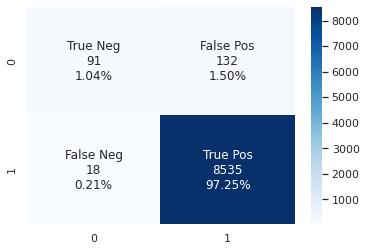

In [70]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')